# Test 1 for M method

## Load

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt

(X_train, y_train),(X_test, y_test) = mnist.load_data()

Labels: [5 0 4 1 9 2 1 3 1 4]


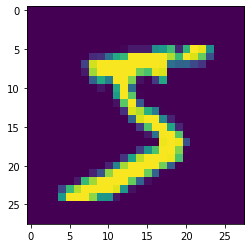

In [3]:
plt.imshow(X_train[0])
print("Labels:", y_train[:10])

## Preprocessing

In [4]:
print("Max:", np.max(X_train))
print("Min:", np.min(X_train))

Max: 255
Min: 0


In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
np.shape(X_train)

(60000, 28, 28)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

print("X_train shape: ",np.shape(X_train))
print("X_train shape: ",np.shape(X_test))

X_train shape:  (60000, 28, 28, 1)
X_train shape:  (10000, 28, 28, 1)


In [ ]:
from tensorflow.keras.utils import to_categorical

# When you are using your own dataset here, make sure about the number of labels there will be.

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [ ]:
print("New labels: ", y_train[:10])

New labels:  [5 0 4 1 9 2 1 3 1 4]


## Image processing functions ##

In [ ]:
def avg(feature):
    sum = 0
    size = len(feature)
    
    for value in feature:
        sum += value

    return sum/size

In [ ]:
from tensorflow import convert_to_tensor
import tensorflow as tf

def custom_functions(batch):
    response = []
    
    images = batch.numpy()
    print(images)

    # Iterate through all of the images in the batch
    for i in range(1):
        image = tf.reshape(batch[i], (28, 28))
        # response.extend(Moment(image).feature)

    return convert_to_tensor([response], dtype=tf.float32)

### Moment ###

In [ ]:
from PIL import Image
import tensorflow as tf
import cv2

class Moment(object):
    def __init__(self, image = None):
        if( image != None ):
            print(image)
            metric = self.getMetric(tf.reshape(image, (tf.shape(image)[0], tf.shape(image)[1])))
            self.feature = metric
    
    def __get__(self, instance, owner):
        return this.feature

    @tf.function
    def getMetric( self, image ):
        height, width = image.shape

        y_sums = np.zeros(width)
        y_counts = np.zeros(width)

        x_averages = []

        # Up-Down
        for y in range(height):

            x_sum = x_count = 0

            # Left-Right
            for x in range(width):
                value = image[y][x]
                if (value > 0):

                    y_counts[x] += 1
                    x_count += 1

                    x_sum += value * x
                    y_sums[x] += value * y

            if x_count != 0:
                x_averages.append(x_sum / x_count)
            else:
                x_averages.append(0)

        y_averages = np.zeros(width)
        for i in range(len(y_sums)):
            if (y_counts[i] == 0):
                y_averages[i] = 0
            else:
                y_averages[i] = y_sums[i] / y_counts[i]

        mid_x = width/2
        mid_y = height/2

        return [
            abs(sum(y_averages)/len(y_averages) - mid_y)/mid_y,
            abs(sum(x_averages)/len(x_averages) - mid_x)/mid_x,
        ]

### Signature ###

In [ ]:
import numpy as np

def threshold(image: object, threshold: int = 200):
    return cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)[1]

class Signature:
    def __init__(self, image = None):
        self.feature = self.getMetric(image)
        self.value = avg(self.feature)

    def getMetric(self, image): 
        rows, cols = np.shape(image) 

        image = threshold(image)

        signature_out = []

        for cols_counter in range(cols):
        
            signature_total = 0

            for row_counter in range(rows):
                signature_total += image[row_counter][cols_counter]

            signature_total =  255 - int(round(signature_total / rows))

            # signature_out += f'{signature_total}'
            signature_out.append(signature_total)
            
        return signature_out

## Model

### Sequential model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPool2D

model_1 = Sequential()
model_1.add(Conv2D(filters=50, kernel_size=(3,3), input_shape=(28, 28, 1), activation=relu))
model_1.add(MaxPool2D(pool_size=(3,3)))

model_1.add(Dropout(rate=.5))

model_1.add(Conv2D(filters=75, kernel_size=(3,3), activation=relu))
model_1.add(MaxPool2D(pool_size=(3,3)))

model_1.add(Flatten())

model_1.add(Dense(units=10, activation=softmax))

model_1.compile(optimizer=Adam(), loss=categorical_crossentropy, metrics=["accuracy"])
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 50)        500       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 50)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 50)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 75)          33825     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 75)          0         
_________________________________________________________________
flatten (Flatten)            (None, 300)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                3

### Functional model

In [6]:
from tensorflow.keras.models import Model
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPool2D, Input

In [7]:
inputs = Input(shape=(28,28,1))

conv2 = Conv2D(filters=50, kernel_size=(3,3), activation=relu)(inputs)

pool1 = MaxPool2D(pool_size=(3,3))(conv2)

dropout1 = Dropout(rate=.5)(pool1)

conv2 = Conv2D(filters=75, kernel_size=(3,3), activation=relu)(dropout1)
pool2 = MaxPool2D(pool_size=(3,3))(conv2)

flatten1 = Flatten()(pool2)

outputs = Dense(units=10, activation=softmax)(flatten1)

model_1 = Model(inputs=inputs, outputs=outputs, name="functional_mnist")

model_1.compile(optimizer=Adam(), loss=categorical_crossentropy, metrics=["accuracy"])

model_1.summary()

Model: "functional_mnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 50)        500       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 50)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 50)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 75)          33825     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 75)          0         
_________________________________________________________________
flatten (Flatten)            (None, 300)          

### Multi-input

In [1]:
BATCH_SIZE=10

In [2]:
print("Test this ting.")

Test this ting.


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    Conv2D,
    Flatten,
    MaxPool2D,
    Input,
    Lambda,
    Concatenate,
    Reshape,
)

In [10]:
inputs = [
    Input(shape=(28,28,1), name="convolutional"),
    Input(shape=(28,28,1), name="custom"),
]

# Convolutional
conv2 = Conv2D(filters=50, kernel_size=(3,3), activation=relu)(inputs[0])
pool1 = MaxPool2D(pool_size=(3,3))(conv2)
dropout1 = Dropout(rate=.5)(pool1)
conv2 = Conv2D(filters=75, kernel_size=(3,3), activation=relu)(dropout1)
pool2 = MaxPool2D(pool_size=(3,3))(conv2)
flatten1 = Flatten()(pool2)

# Custom
lambda1 = Lambda(custom_functions)(inputs[1])
flatten2 = Flatten()(lambda1)

# Merge
concat1 = Concatenate(axis=1)([flatten1, flatten2])

# Output
outputs = Dense(units=10, activation=softmax)(concat1)

model_1 = Model(inputs=[inputs[0], inputs[1]], outputs=outputs, name="functional_mnist")
model_1.compile(optimizer=Adam(), loss=categorical_crossentropy, metrics=["accuracy"])
model_1.summary()

NameError: name 'custom_functions' is not defined

#### Functions

In [ ]:
def test_function(x):
    # for i in range(x.shape[0]):
    #     image = np.reshape(x[i], (28, 28))
    #     plt.figure(i)
    #     plt.imshow(image)
    return tf.convert_to_tensor([[.3]], dtype=tf.float32)

In [ ]:
@tf.function
def StandaloneMoment( self, image ):
    height, width = image.shape

    y_sums = np.zeros(width)
    y_counts = np.zeros(width)

    x_averages = []

    # Up-Down
    for y in range(height):

        x_sum = x_count = 0

        # Left-Right
        for x in range(width):
            value = image[y][x]
            if (value > 0):

                y_counts[x] += 1
                x_count += 1

                x_sum += value * x
                y_sums[x] += value * y

        if x_count != 0:
            x_averages.append(x_sum / x_count)
        else:
            x_averages.append(0)

    y_averages = np.zeros(width)
    for i in range(len(y_sums)):
        if (y_counts[i] == 0):
            y_averages[i] = 0
        else:
            y_averages[i] = y_sums[i] / y_counts[i]

    mid_x = width/2
    mid_y = height/2

    return [
        abs(sum(y_averages)/len(y_averages) - mid_y)/mid_y,
        abs(sum(x_averages)/len(x_averages) - mid_x)/mid_x,
    ]

#### Model

In [ ]:
# Branch 1
inputs1 = Input(shape=(28,28,1), name="convolutional")

conv2 = Conv2D(filters=50, kernel_size=(3,3), activation=relu)(inputs1)

pool1 = MaxPool2D(pool_size=(3,3))(conv2)

dropout1 = Dropout(rate=.5)(pool1)

conv2 = Conv2D(filters=75, kernel_size=(3,3), activation=relu)(dropout1)
pool2 = MaxPool2D(pool_size=(3,3))(conv2)

flatten1 = Flatten()(pool2)

# I tried reshaping here for the concatenate layer.

In [ ]:
# Branch 2
inputs2 = Input(shape=(28,28,1), name="custom")

lambda1 = Lambda(test_function)(inputs2)
flatten2 = Flatten()(lambda1)
# dense1 = Dense(300, activation=relu)(lambda1)

In [ ]:
print(flatten1.shape)
print(flatten2.shape)

In [ ]:
# Merger

concat1 = Concatenate(axis=1)([flatten1, flatten2])

outputs = Dense(units=10, activation=softmax)(flatten1)

model_1 = Model(inputs=[inputs1, inputs2], outputs=outputs, name="functional_mnist")

model_1.compile(optimizer=Adam(), loss=categorical_crossentropy, metrics=["accuracy"])

model_1.summary()

## Train

In [ ]:
from keras.callbacks import EarlyStopping

model_1.fit(
    x={
        "convolutional": X_train,
        "custom": X_train,
    },
    y=y_train_cat,
    batch_size=BATCH_SIZE,
    epochs=50,
    callbacks=[EarlyStopping(patience=2)],
    validation_data=({
        "convolutional": X_test,
        "custom": X_test,
    }, y_test_cat)
)

Epoch 1/50
6000/6000 [==============================] - 60s 10ms/step - loss: 0.0729 - accuracy: 0.9760 - val_loss: 0.0363 - val_accuracy: 0.9879
Epoch 2/50
6000/6000 [==============================] - 60s 10ms/step - loss: 0.0587 - accuracy: 0.9819 - val_loss: 0.0306 - val_accuracy: 0.9896
Epoch 3/50
6000/6000 [==============================] - 61s 10ms/step - loss: 0.0513 - accuracy: 0.9838 - val_loss: 0.0350 - val_accuracy: 0.9877
Epoch 4/50
6000/6000 [==============================] - 61s 10ms/step - loss: 0.0461 - accuracy: 0.9854 - val_loss: 0.0337 - val_accuracy: 0.9896


## Test

# Scratch

## Do not touch !! ##

In [ ]:
from keras.layers import Lambda
import tensorflow as tf

In [ ]:
def test_function(x):
    # for i in range(x.shape[0]):
    #     image = np.reshape(x[i], (28, 28))
    #     plt.figure(i)
    #     plt.imshow(image)
    return tf.convert_to_tensor([.3], dtype=tf.float32)

In [ ]:
model = Sequential()
model.add(Lambda(test_function, input_shape=(28, 28, 1)))

model.compile()
model.summary()

Tensor("Placeholder:0", shape=(None, 28, 28, 1), dtype=float32)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 28, 28, 1)         0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [ ]:
class test_data:
    data = X_train[:10,:,:,:]
    labels = y_train_cat[:10,:]

In [ ]:
result = Lambda(test_function, input_shape=(28, 28, 1))(test_data.data[:2])
print(result)

tf.Tensor([0.3], shape=(1,), dtype=float32)


## Multi-input

### v0.1.0

In [ ]:
# Checkpoint:
#   - Ek het hier probeer om die goed reg te kry en dit lyk vir my of die probleem
#   op die oomblik is dat die labels nie on-hot encoded is nie so verander dit as
#   jy volgende keer van hier af begin werk.

# Function
@tf.function
def StandaloneMoment( self, image ):
    height, width = image.shape

    y_sums = np.zeros(width)
    y_counts = np.zeros(width)

    x_averages = []

    # Up-Down
    for y in range(height):

        x_sum = x_count = 0

        # Left-Right
        for x in range(width):
            value = image[y][x]
            if (value > 0):

                y_counts[x] += 1
                x_count += 1

                x_sum += value * x
                y_sums[x] += value * y

        if x_count != 0:
            x_averages.append(x_sum / x_count)
        else:
            x_averages.append(0)

    y_averages = np.zeros(width)
    for i in range(len(y_sums)):
        if (y_counts[i] == 0):
            y_averages[i] = 0
        else:
            y_averages[i] = y_sums[i] / y_counts[i]

    mid_x = width/2
    mid_y = height/2

    return [
        abs(sum(y_averages)/len(y_averages) - mid_y)/mid_y,
        abs(sum(x_averages)/len(x_averages) - mid_x)/mid_x,
    ]

# Divider function
from tensorflow import convert_to_tensor
import tensorflow as tf

def custom_functions(batch):
    response = []

    # Iterate through all of the images in the batch
    for i in range(1):
        image = tf.reshape(batch[i], (28, 28))
        # response.extend(Moment(image).feature)

    result = [7,8]
    result = np.reshape(result, newshape=(1,np.shape(result)[0]))
    return convert_to_tensor(result, dtype=tf.float32)

inputs = [
    Input(shape=(28,28,1), name="convolutional"),
    Input(shape=(28,28,1), name="custom"),
]

# Model
# Convolutional
conv2 = Conv2D(filters=50, kernel_size=(3,3), activation=relu)(inputs[0])
pool1 = MaxPool2D(pool_size=(3,3))(conv2)
dropout1 = Dropout(rate=.5)(pool1)
conv2 = Conv2D(filters=75, kernel_size=(3,3), activation=relu)(dropout1)
pool2 = MaxPool2D(pool_size=(3,3))(conv2)
flatten1 = Flatten()(pool2)

# Custom
lambda1 = Lambda(custom_functions)(inputs[0])
flatten2 = Flatten()(lambda1)

# Merge
concat1 = Concatenate(axis=1)([flatten1, flatten2])

# Output
outputs = Dense(units=10, activation=softmax)(concat1)

model_1 = Model(inputs=inputs[0], outputs=outputs, name="functional_mnist")
model_1.compile(optimizer=Adam(), loss=categorical_crossentropy, metrics=["accuracy"])
model_1.summary()

training_data = np.array([X_train[0]])
training_labels = np.array([y_train_cat[0]])
print(training_labels)
model_1.fit(training_data, training_labels, batch_size=1, validation_data=(np.array(X_test[:5]), np.array(y_test_cat[:5])))

Model: "functional_mnist"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
convolutional (InputLayer)      [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 26, 26, 50)   500         convolutional[0][0]              
__________________________________________________________________________________________________
max_pooling2d_8 (MaxPooling2D)  (None, 8, 8, 50)     0           conv2d_8[0][0]                   
__________________________________________________________________________________________________
dropout_4 (Dropout)             (None, 8, 8, 50)     0           max_pooling2d_8[0][0]            
___________________________________________________________________________________

### v0.2.0*


In [ ]:
# Checkpoint:
# Okay nee, ek dink nie die gaan werk nie. Ek sal moet alles met tf operations doen lyk dit
#   my, en dit is bietjie meer as wat ek voor beplan.
# So ek dink maak 'n ekstra stap voor jy die model begin train om die goed voor die tyd
# uit te werk en voer dan die twee intputs in die model in volgende keer as jy hiermee werk.

import tensorflow as tf

# Function
def StandaloneMoment( image ):
    height, width = image.shape

    y_sums = np.zeros(width)
    y_counts = np.zeros(width)

    x_averages = []

    # Up-Down
    for y in range(height):

        x_sum = x_count = 0

        # Left-Right
        for x in range(width):
            value = image[y][x]
            with tf.compat.v1.Session() as sess:
                parsed_value = sess.run(value)
                if (value > 0):

                    y_counts[x] += 1
                    x_count += 1

                    print(parsed_value)
                    x_sum += value * x
                    y_sums[x] += value * y

        if x_count != 0:
            x_averages.append(x_sum / x_count)
        else:
            x_averages.append(0)

    y_averages = np.zeros(width)
    for i in range(len(y_sums)):
        if (y_counts[i] == 0):
            y_averages[i] = 0
        else:
            y_averages[i] = y_sums[i] / y_counts[i]

    mid_x = width/2
    mid_y = height/2

    return [
        abs(sum(y_averages)/len(y_averages) - mid_y)/mid_y,
        abs(sum(x_averages)/len(x_averages) - mid_x)/mid_x,
    ]

# Divider function
from tensorflow import convert_to_tensor
import tensorflow as tf

def custom_functions(batch):
    response = []
    # Iterate through all of the images in the batch
    for i in range(1):
        image = np.reshape(batch[i], (28, 28))
        # function = StandaloneMoment(image)


    result = [.5, .7]
    result = np.reshape(result, newshape=(1,np.shape(result)[0]))
    return convert_to_tensor(result, dtype=np.float32)

inputs = [
    Input(shape=(28,28,1), name="convolutional"),
    Input(shape=(2), name="custom"),
]

# Model
# Convolutional
conv2 = Conv2D(filters=50, kernel_size=(3,3), activation=relu)(inputs[0])
pool1 = MaxPool2D(pool_size=(3,3))(conv2)
dropout1 = Dropout(rate=.5)(pool1)
conv2 = Conv2D(filters=75, kernel_size=(3,3), activation=relu)(dropout1)
pool2 = MaxPool2D(pool_size=(3,3))(conv2)
flatten1 = Flatten()(pool2)

# Merge
concat1 = Concatenate(axis=1)([flatten1, inputs[1]])

# Output
outputs = Dense(units=10, activation=softmax)(concat1)

model_1 = Model(inputs=(inputs[0], inputs[1]), outputs=outputs, name="functional_mnist")
model_1.compile(optimizer=Adam(), loss=categorical_crossentropy, metrics=["accuracy"])
model_1.summary()

training_data = np.array([X_train[0]])
training_labels = np.array([y_train_cat[0]])
print(training_labels)
model_1.fit([training_data, custom_functions(training_data)], training_labels, batch_size=1, validation_data=([training_data, custom_functions(training_data)],training_labels))

Model: "functional_mnist"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
convolutional (InputLayer)      [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_28 (Conv2D)              (None, 26, 26, 50)   500         convolutional[0][0]              
__________________________________________________________________________________________________
max_pooling2d_28 (MaxPooling2D) (None, 8, 8, 50)     0           conv2d_28[0][0]                  
__________________________________________________________________________________________________
dropout_14 (Dropout)            (None, 8, 8, 50)     0           max_pooling2d_28[0][0]           
___________________________________________________________________________________

In [ ]:
ar = custom_functions(X_train[:5])
print(ar.shape)

(1, 2)


In [ ]:
import tensorflow as tf

dataset = tf.data.Dataset.from_tensor_slices(X_train)

for item in dataset:
    print

This cell output is too large and can only be displayed while logged in.
